In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv("imdb_dataset.csv")

In [2]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.isnull().sum()


review       0
sentiment    0
dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

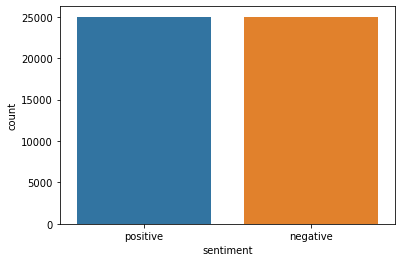

In [4]:
sns.countplot(x="sentiment", data=df)


In [5]:
tfidf = TfidfVectorizer(max_features=5000)

X = tfidf.fit_transform(df["review"]).toarray()
y = df["sentiment"].apply(lambda x: 1 if x == "positive" else 0).values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
base_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
bagging_model = BaggingClassifier(base_model, n_estimators=10, random_state=42)
boosting_model = AdaBoostClassifier(base_model, n_estimators=10, random_state=42)

models = [("Base Model", base_model), ("Bagging Model", bagging_model), ("Boosting Model", boosting_model)]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(name)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("------------------------------")


Base Model
Accuracy: 0.8799
Confusion Matrix:
 [[4327  634]
 [ 567 4472]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      4961
           1       0.88      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

------------------------------
